In [9]:
import os
import tensorflow as tf
from gan.CGAN import CGanNet
import tensorflow_datasets as tfds
import numpy as np

In [10]:
BATCH_SIZE = 32
IMAGE_WIDTH = 112
IMAGE_HEIGHT = 112

In [11]:
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [12]:
# Load and prepare dataset

(training_set, validation_set), dataset_info = tfds.load(
    'oxford_flowers102',
    split=['test', 'train'],
    with_info=True,
    as_supervised=True,
)

num_training_examples = 0
for example in training_set:
    num_training_examples += 1

def format_image(image, label):
    image = tf.image.resize(image, (IMAGE_WIDTH, IMAGE_HEIGHT))/255.0
    return image, label

train_batches = training_set.shuffle(num_training_examples//4).map(format_image)

num_classes = dataset_info.features['label'].num_classes
train_batches_images = np.array([_[0] for _ in train_batches])
train_batches_labels = np.array([_[1] for _ in train_batches])

In [13]:
cgan = CGanNet(batch_size=BATCH_SIZE,
          batches_per_epoch=40,
          image_width=IMAGE_WIDTH,
          image_height=IMAGE_HEIGHT,
          number_of_channels=3,
          latent_dimension=100,
          training_data=train_batches_images,
          labels_data=train_batches_labels,
          number_of_classes=num_classes
)

In [14]:
#cgan.clear_files_structure()

In [15]:
cgan.define_discriminator()
cgan.define_generator()
cgan.define_gan()
cgan.create_files_structure()

In [ ]:
#cgan.train(number_of_epochs=1, load_past_model=False)
#cgan.plot_loss()

Dataset size: 6149
Batches per epoch: 40
----> Load epoch number: 500 from file .epoch
----> Epoch: 501
40/40 [==============================] - 16s 405ms/step

D_real_loss: 0.5612963438034058 D_fake_loss: 0.48579734563827515 G_loss: 1.246254324913025
D_real_acc: 0.78125 D_fake_acc: 0.8125
----> Epoch: 502
40/40 [==============================] - 16s 404ms/step

D_real_loss: 0.5236275792121887 D_fake_loss: 0.5166678428649902 G_loss: 1.2727142572402954
D_real_acc: 0.6875 D_fake_acc: 0.8125
----> Epoch: 503
40/40 [==============================] - 16s 390ms/step

D_real_loss: 0.5016434192657471 D_fake_loss: 0.6122943162918091 G_loss: 1.096359133720398
D_real_acc: 0.8125 D_fake_acc: 0.6875
----> Epoch: 504
40/40 [==============================] - 16s 414ms/step

D_real_loss: 0.5550734400749207 D_fake_loss: 0.5004711151123047 G_loss: 1.2622172832489014
D_real_acc: 0.78125 D_fake_acc: 0.8125
----> Epoch: 505
40/40 [==============================] - 16s 396ms/step

D_real_loss: 0.42737320065

----> Load epoch number: 600 from file .epoch


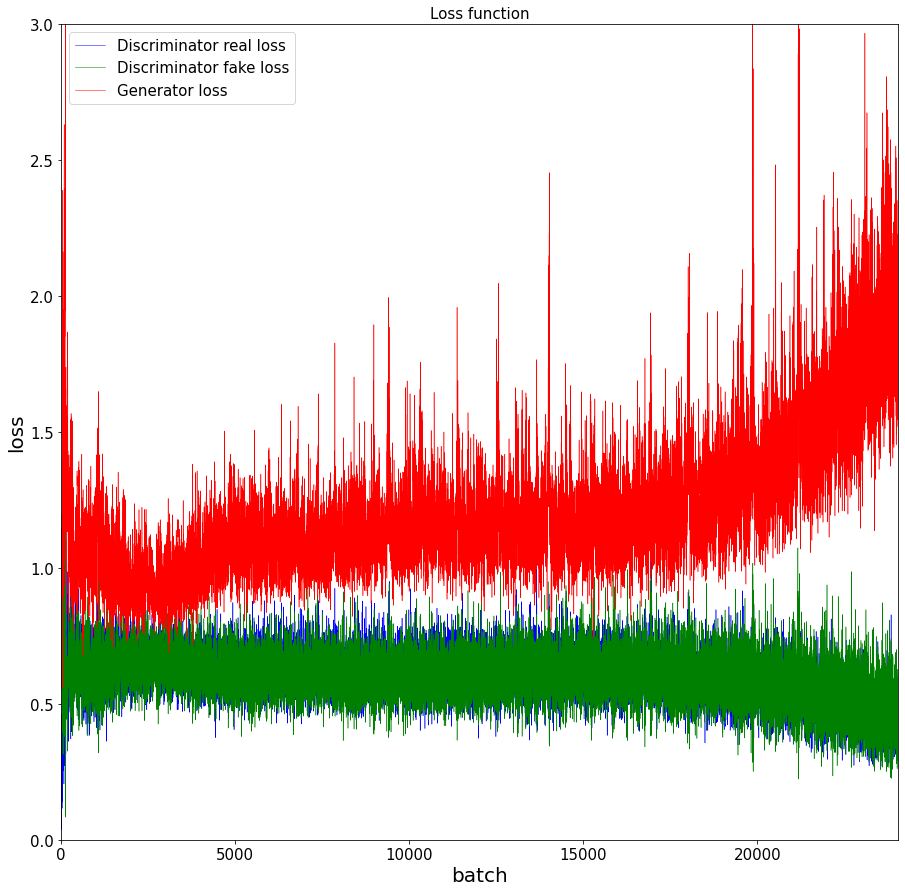

In [22]:
cgan.train(number_of_epochs=100, load_past_model=True)
cgan.plot_loss()